In [85]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, cuda

In [86]:
X = np.load("Data/pedtrainset.npy")
X = X.T/255
y = np.load("Data/pedtrainlabels.npy")
test_set = np.load("Data/pedtestset.npy")
Y_test = test_set.T/255
test_set_labels = np.load("Data/pedtestlabels.npy")

In [87]:
w = np.zeros((X.shape[0], 1))
b = 0.0

In [88]:
custo = []

In [89]:
@jit(target_backend='cuda')
def fit(X, Y, w, b, learning_rate=0.05):
    z = w.T.dot(X)+b
    a = 1/(1+np.exp(-z)) 
    cost = -(np.mean(y*np.log(a)+(1-y)*np.log(1-a)))
    dz = a-y
    dw = 1/X.shape[1]*np.dot(X, dz.T) 
    db = 1/X.shape[1]*np.sum(dz)
    return w-learning_rate*dw, b-learning_rate*db, cost

In [90]:
for i in range(1000):
    w, b, cost = fit(X, y, w, b)
    custo.append(cost)

In [91]:
custo

[0.6931471805593794,
 0.6852265372090363,
 0.6772993563026093,
 0.6703889692315069,
 0.6635592221786139,
 0.6574887040749482,
 0.6515606460757268,
 0.6462082038709189,
 0.6410382272689786,
 0.6363099619355757,
 0.6317836466470157,
 0.6276005664361631,
 0.6236209435429596,
 0.6199117113902569,
 0.6163940353539894,
 0.6130924085611591,
 0.6099626377825881,
 0.6070079639948126,
 0.6042027829963085,
 0.6015415692391277,
 0.5990084249459144,
 0.5965954352405668,
 0.5942918672752113,
 0.5920901133853658,
 0.5899823704762033,
 0.5879621538795713,
 0.5860234666416091,
 0.5841609773770269,
 0.5823698887178542,
 0.5806458178989137,
 0.5789848125189675,
 0.5773832204660307,
 0.57583771473885,
 0.5743452043590848,
 0.5729028460274128,
 0.5715079898418486,
 0.5701581805232531,
 0.5688511247702345,
 0.5675846870111783,
 0.5663568689411825,
 0.565165803079947,
 0.5640097390334707,
 0.562887036604855,
 0.5617961558821154,
 0.5607356507176708,
 0.5597041611395482,
 0.5587004075162875,
 0.55772318449928

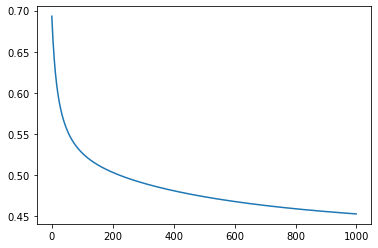

In [92]:
plt.plot(custo)
plt.show()

In [146]:
w

array([[0.005409  ],
       [0.00537964],
       [0.0053351 ],
       [0.00529187],
       [0.00529841],
       [0.00533912],
       [0.00532629],
       [0.00528849],
       [0.00525836],
       [0.0052825 ],
       [0.00531989],
       [0.00531924],
       [0.00528627],
       [0.00525105],
       [0.00525425],
       [0.00528667],
       [0.0053109 ],
       [0.00534496],
       [0.00536182],
       [0.00532497],
       [0.00527666],
       [0.00524415],
       [0.00524787],
       [0.00524836],
       [0.00524222],
       [0.00517057],
       [0.00511433],
       [0.0051192 ],
       [0.00517802],
       [0.00519859],
       [0.00517279],
       [0.00515953],
       [0.00518144],
       [0.00521798],
       [0.00524409],
       [0.00528555],
       [0.00530168],
       [0.00526121],
       [0.00520912],
       [0.00517209],
       [0.00513268],
       [0.00510035],
       [0.00507846],
       [0.00500166],
       [0.0049433 ],
       [0.00495539],
       [0.00500374],
       [0.005

In [147]:
b

0.005589647965184611

In [32]:
def predict(x_pred, w, b):
    return 1/(1+np.exp(-(w.T.dot(x_pred)+b)))

In [174]:
y[0]

1

In [175]:
X.T[0].shape

(648,)

In [104]:
for i in range(10):
    if predict(Y_test.T[i], w, b) > 0.5:
        print(1)
    else:
        print(0)

1
1
0
1
0
1
1
1
0
1


In [175]:
for i in range(10):
    print(test_set_labels[i])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0


In [98]:
np.save("weights", w)
np.save("bias", b)

In [99]:
wg = np.load("weights.npy")
ba = np.load("bias.npy")

In [101]:
for i in range(1000):
    wg, ba, cost = fit(X, y, wg, ba)
    custo.append(cost)

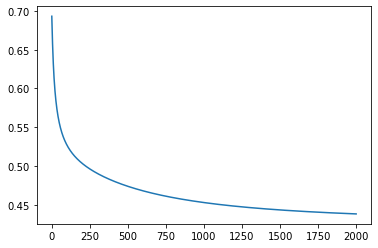

In [102]:
plt.plot(custo)
plt.show()

In [103]:
for i in range(10):
    if predict(Y_test.T[i], wg, ba) > 0.5:
        print(1)
    else:
        print(0)

1
0
0
1
0
1
1
1
1
1
